**Task 2: Predict Future Stock Prices (Short-Term)**

**Objective:**

Use historical stock data to predict the next days closing price.

**Dataset:**

Stock market data from Yahoo Finance (retrieved using the yfinance Python library)

In [ ]:
!pip install yfinance

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Load stock market data**

In [20]:
ticker = "AAPL"

In [ ]:
data = yf.download(ticker, period="1y")      # Download 1 year of data

In [22]:
print("First 5 rows:")  # Show first five rows
print(data.head())

First 5 rows:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-11-15  223.986954  225.898307  223.260245  225.380644  47923700
2024-11-18  226.993362  228.705619  224.156188  224.235830  44633700
2024-11-19  227.252197  229.123738  225.639496  225.958047  36211800
2024-11-20  227.968948  228.894754  224.872950  227.033178  35169600
2024-11-21  227.491104  229.123719  224.693758  227.849484  42108300


**Prepare Features & Target**

In [23]:
data["Next_Close"] = data["Close"].shift(-1)     # Create the "Next Day Close" column (shift close price upward by 1)

In [24]:
data = data[:-1]    # Remove the last row (it will have no next-day close)

**Features we use to predict**

In [25]:
X = data[["Open", "High", "Low", "Volume"]]

**Target we want to predict**

In [28]:
y = data["Next_Close"]

 **Split data into training and testing sets**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

**Train a Linear Regression model**

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Training Completed!")


Model Training Completed!


**Make predictions**

In [32]:
predictions = model.predict(X_test)

**Compare Actual vs Predicted Prices**

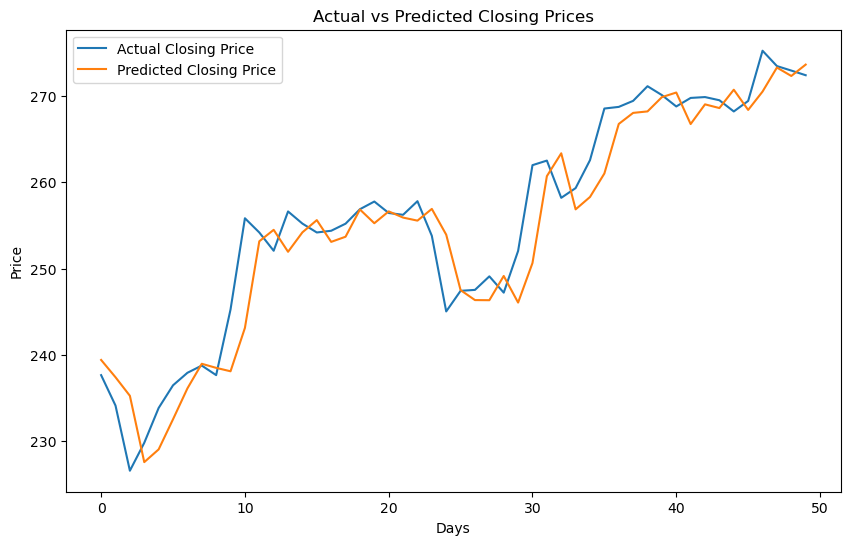

In [33]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Closing Price")
plt.plot(predictions, label="Predicted Closing Price")
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

After training the model on historical stock data,
I compared the actual closing prices with the predicted values.
The lines followed a similar direction, showing that the model 
was able to learn general price trends. However, it was not perfect.
There were differences on days with sudden market movements, which
is normal for simple regression models.